![](2022-10-19-15-23-00.png)

In [11]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

In [12]:
varbounds = np.array([[50,200]])   

vartype = np.array([['int']])

In [13]:
def f(x):
    return - (1001-5*x[0])*x[0]

In [14]:
model = ga(function=f, dimension =1, variable_type_mixed=vartype, variable_boundaries=varbounds)

 The best solution found:                                                                           
 [100.]

 Objective function:
 -50100.0


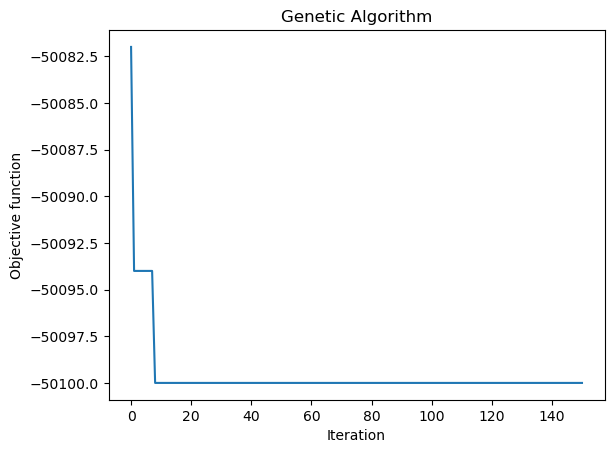

In [15]:
model.run()

In [16]:
## Same solution using Pyomo linear programming

In [17]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [18]:
model = pyo.ConcreteModel()

In [23]:
model.p = pyo.Var(bounds = (50,200),within = pyo.Integers)

p = model.p

    'pyomo.core.base.var.ScalarVar'>) on block unknown with a new Component
    (type=<class 'pyomo.core.base.var.AbstractScalarVar'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().


In [25]:
# Objective function

model.obj = pyo.Objective(expr = (1001-5*p)*p, sense  = pyo.maximize)

In [26]:
opt  = SolverFactory('gurobi')

In [27]:
opt.solve(model)

{'Problem': [{'Name': 'x2', 'Lower bound': 50100.0, 'Upper bound': 50100.0, 'Number of objectives': 1, 'Number of constraints': 1, 'Number of variables': 2, 'Number of binary variables': 0, 'Number of integer variables': 1, 'Number of continuous variables': 1, 'Number of nonzeros': 1, 'Sense': 'maximize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.0007181167602539062', 'Error rc': 0, 'Time': 0.08913588523864746}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [28]:
model.pprint()

1 Var Declarations
    p : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :    50 : 100.0 :   200 : False : False : Integers

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : (1001 - 5*p)*p

2 Declarations: p obj


In [29]:
pyo.value(p)

100.0

In [30]:
pyo.value(model.obj)

50100.0